# Project: Gender prediction of on AR Random image data

In [91]:
import numpy as np
import cv2
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import time

### Features engineering

In [43]:
# Built-in functions for features extraction

def feature_vectorize(img_name):
    img_RGB = cv2.imread(img_name)
    img_gray  = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY)
    # Flatten image to 1-D array
    img = np.reshape(img_gray, (1,img_gray.shape[0]*img_gray.shape[1]))
    return img

def feature_extraction(file_path, file_list, reduce_features = False, seed = 0, reduce_feature_percent = 0.95):
    total_img_feature = []
    print('Vectorizing features..')
    for file in file_list:
        img_feature = feature_vectorize(file_path + '/' + file)
        total_img_feature.append(img_feature)

    dataset = np.zeros((len(file_list), img_feature.shape[1]))
    for i in range(len(total_img_feature)):
        dataset[i,:] = total_img_feature[i]

    # Reduce dimentionality
    if(reduce_features == True):
        print('Reducing features..')
        np.random.seed(seed)
        random_projection = np.random.randn(dataset.shape[1], int((1 - reduce_feature_percent)*dataset.shape[1]))
        dataset = dataset.dot(random_projection)

    # Standardization
    print('Standardizing dataset..')
    scaler = StandardScaler()
    dataset = scaler.fit_transform(dataset)

    labels = np.concatenate((np.ones((int(len(dataset)/2),)), np.zeros((int(len(dataset)/2),))))

    return dataset, labels

def file_list_generator(id_list, view_list):
    file_list = []
    for id in id_list:
        for view in view_list:
            file_name = 'M' + '-' + str(id).zfill(3) + '-' + str(view).zfill(2) + '.bmp'
            file_list.append(file_name)
    for id2 in id_list:
        for view2 in view_list:
            file_name = 'W' + '-' + str(id2).zfill(3) + '-' + str(view2).zfill(2) + '.bmp'
            file_list.append(file_name)
    print(f'File list is generated of {len(file_list)} image files.')
    return file_list

In [3]:
# Prepare data information
train_id_list = np.arange(1,26)
test_id_list = np.arange(26,51)
view_id = np.concatenate((np.arange(1,8),np.arange(14,21)))

In [111]:
file_path = './data/test2'

# Train data
print('Train dataset:')
train_file_list = file_list_generator(train_id_list, view_id)
X_train, y_train = feature_extraction(file_path, train_file_list, True, reduce_feature_percent=0.4)
print('File size:', X_train.shape[0])
print('Features:', X_train.shape[1])

# Test data
print('\nTest dataset:')
test_file_list = file_list_generator(test_id_list, view_id)
X_test, y_test = feature_extraction(file_path, test_file_list, True, reduce_feature_percent=0.4)
print('File size:', X_test.shape[0])
print('Features:', X_test.shape[1])

Train dataset:
File list is generated of 700 image files.
Vectorizing features..
Reducing features..
Standardizing dataset..
File size: 700
Features: 11880

Test dataset:
File list is generated of 700 image files.
Vectorizing features..
Reducing features..
Standardizing dataset..
File size: 700
Features: 11880


### Train and evaluate model

In [114]:
# Training model
start = time.time()
model = LogisticRegression(max_iter=int(1e3)).fit(X_train, y_train)
print(f"Training model finished after {(time.time() - start):.2f} seconds..")

Training model finished after 1.33 seconds..


In [147]:
# Test model and evaluate
y_pred = model.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {score*100:.2f} %')

Accuracy score: 92.00 %



### Inference model

<Figure size 640x480 with 0 Axes>

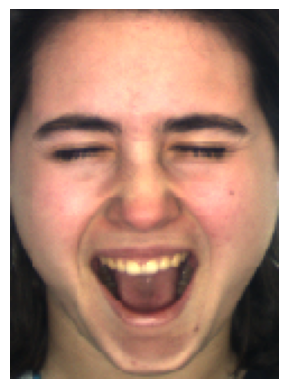

Prediction: Woman


<Figure size 640x480 with 0 Axes>

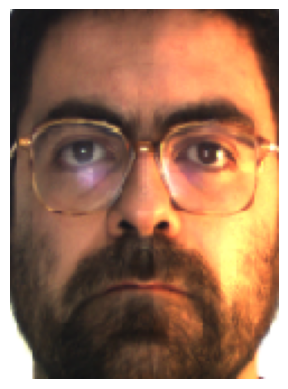

Prediction: Man


<Figure size 640x480 with 0 Axes>

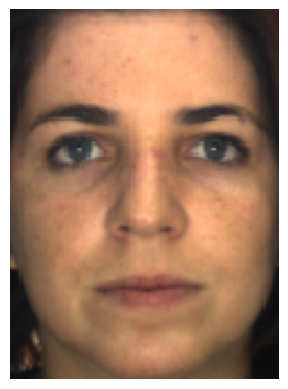

Prediction: Woman


In [206]:
num_test = 3
random_ids = np.random.choice(X_test.shape[0], num_test)
for id in random_ids:
    file_name = file_path + '/' + str(test_file_list[id])
    img = cv2.imread(file_name)
    img_bgra = cv2.cvtColor(img, cv2.COLOR_RGB2BGRA)
    fig = plt.figure()
    plt.figure(facecolor='white')
    plt.axis('off')
    plt.imshow(img_bgra)
    plt.show()

    y_pred_id = model.predict(X_test[id:id+1])
    print('Prediction: Man' if int(y_pred_id) == 1 else 'Prediction: Woman')
